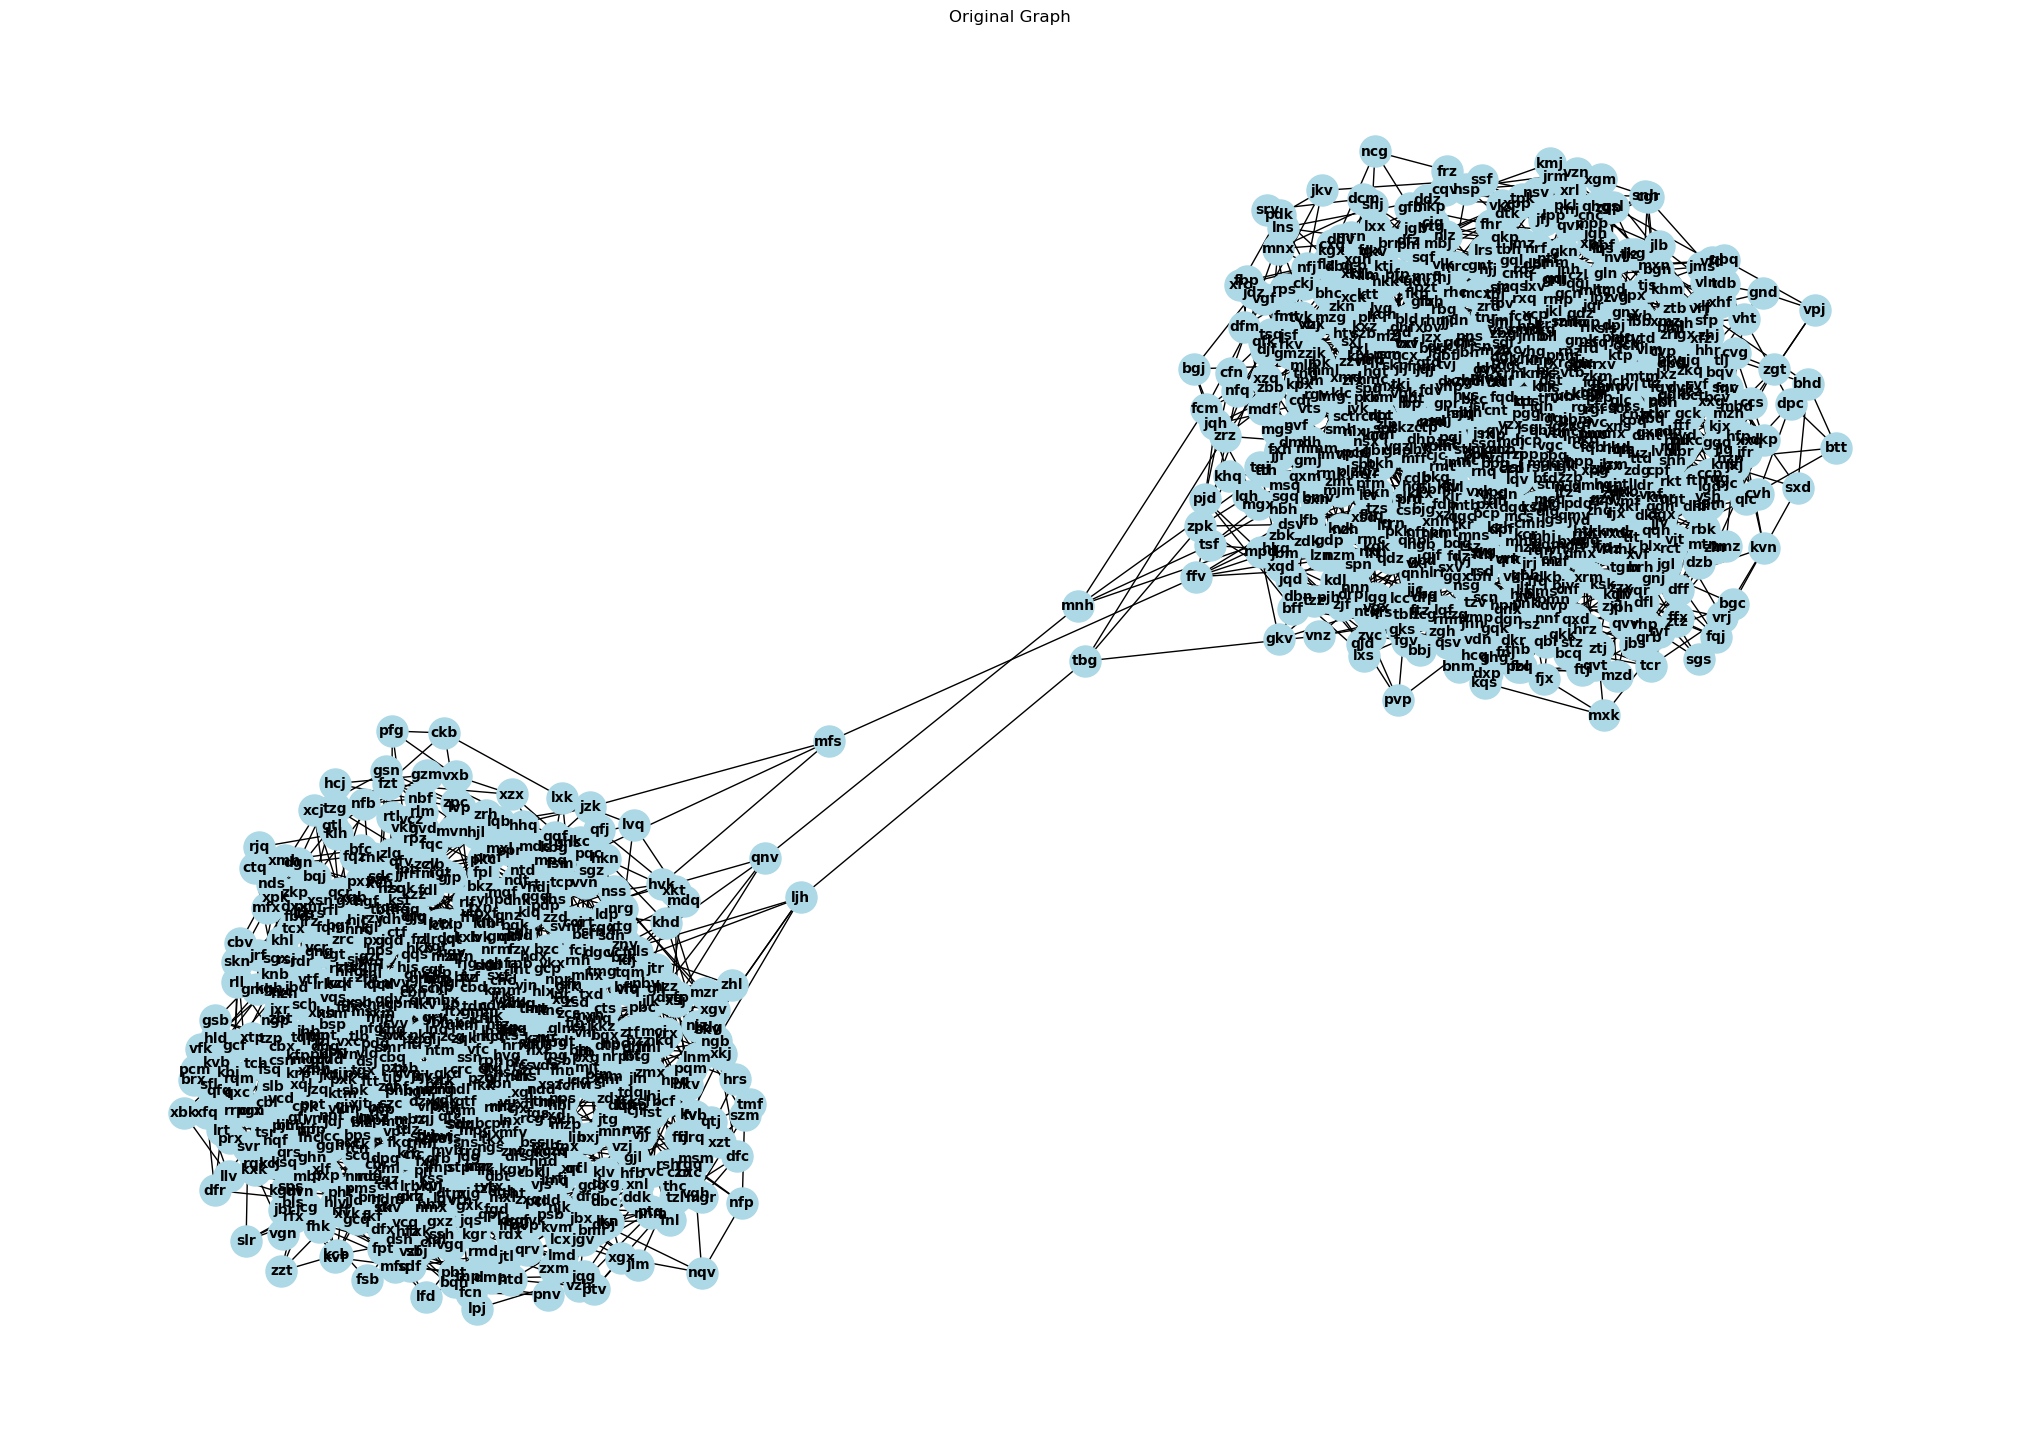

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to read the file and create the graph
def create_graph_from_file(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(':')
            node = parts[0].strip()
            connections = parts[1].strip().split()
            for connection in connections:
                G.add_edge(node, connection)
    return G

# Function to plot the graph
def plot_graph(G, title):
    plt.figure(figsize=(20, 14))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Function to disconnect the graph by removing edges
def disconnect_graph(G, edges_to_remove):
    G_copy = G.copy()
    G_copy.remove_edges_from(edges_to_remove)
    return list(nx.connected_components(G_copy))

# Function to partition the graph using Kernighan-Lin algorithm
def partition_graph_kl(G):
    partition = nx.algorithms.community.kernighan_lin_bisection(G)
    return partition

filename = 'input.txt'  # Ensure this path is correct
G = create_graph_from_file(filename)

# Plot the original graph
plot_graph(G, 'Original Graph')


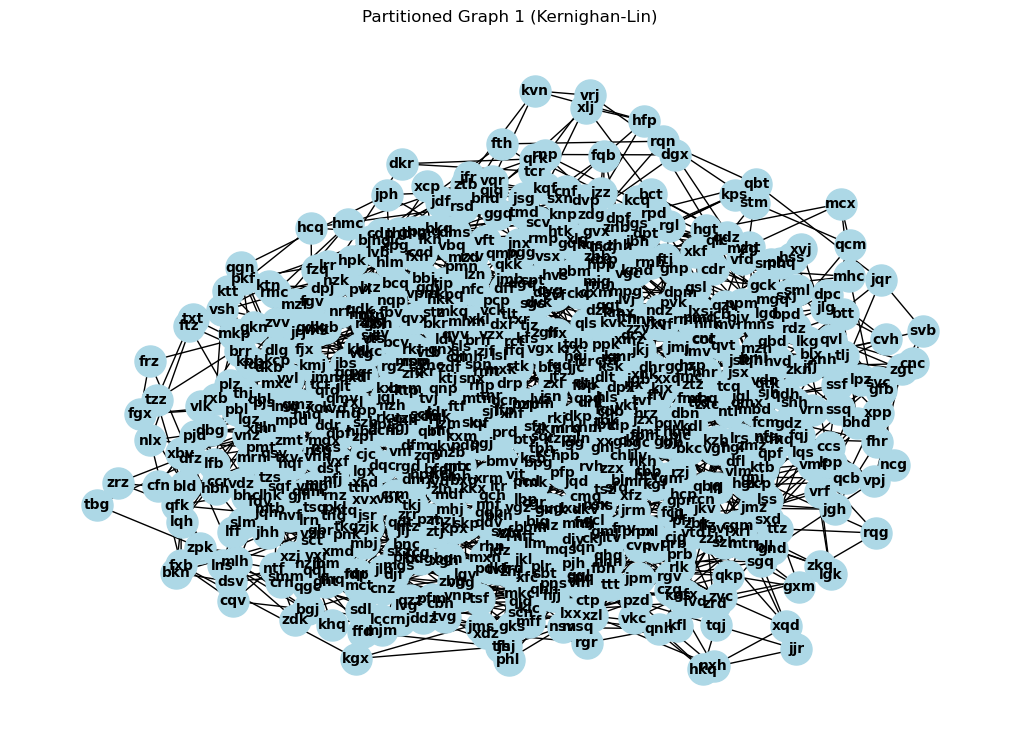

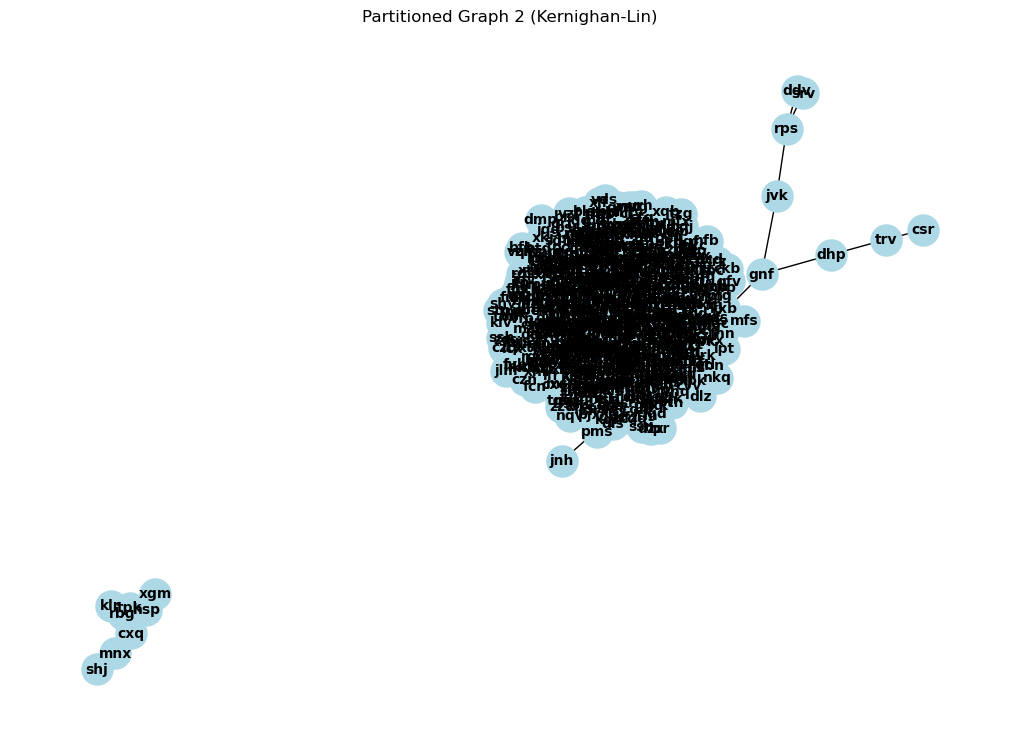

In [3]:
# Partition the graph using Kernighan-Lin algorithm
bisection = partition_graph_kl(G)

# Plot the partitions
for i, part in enumerate(bisection):
    subgraph = G.subgraph(part)
    plot_graph(subgraph, f'Partitioned Graph {i + 1} (Kernighan-Lin)')

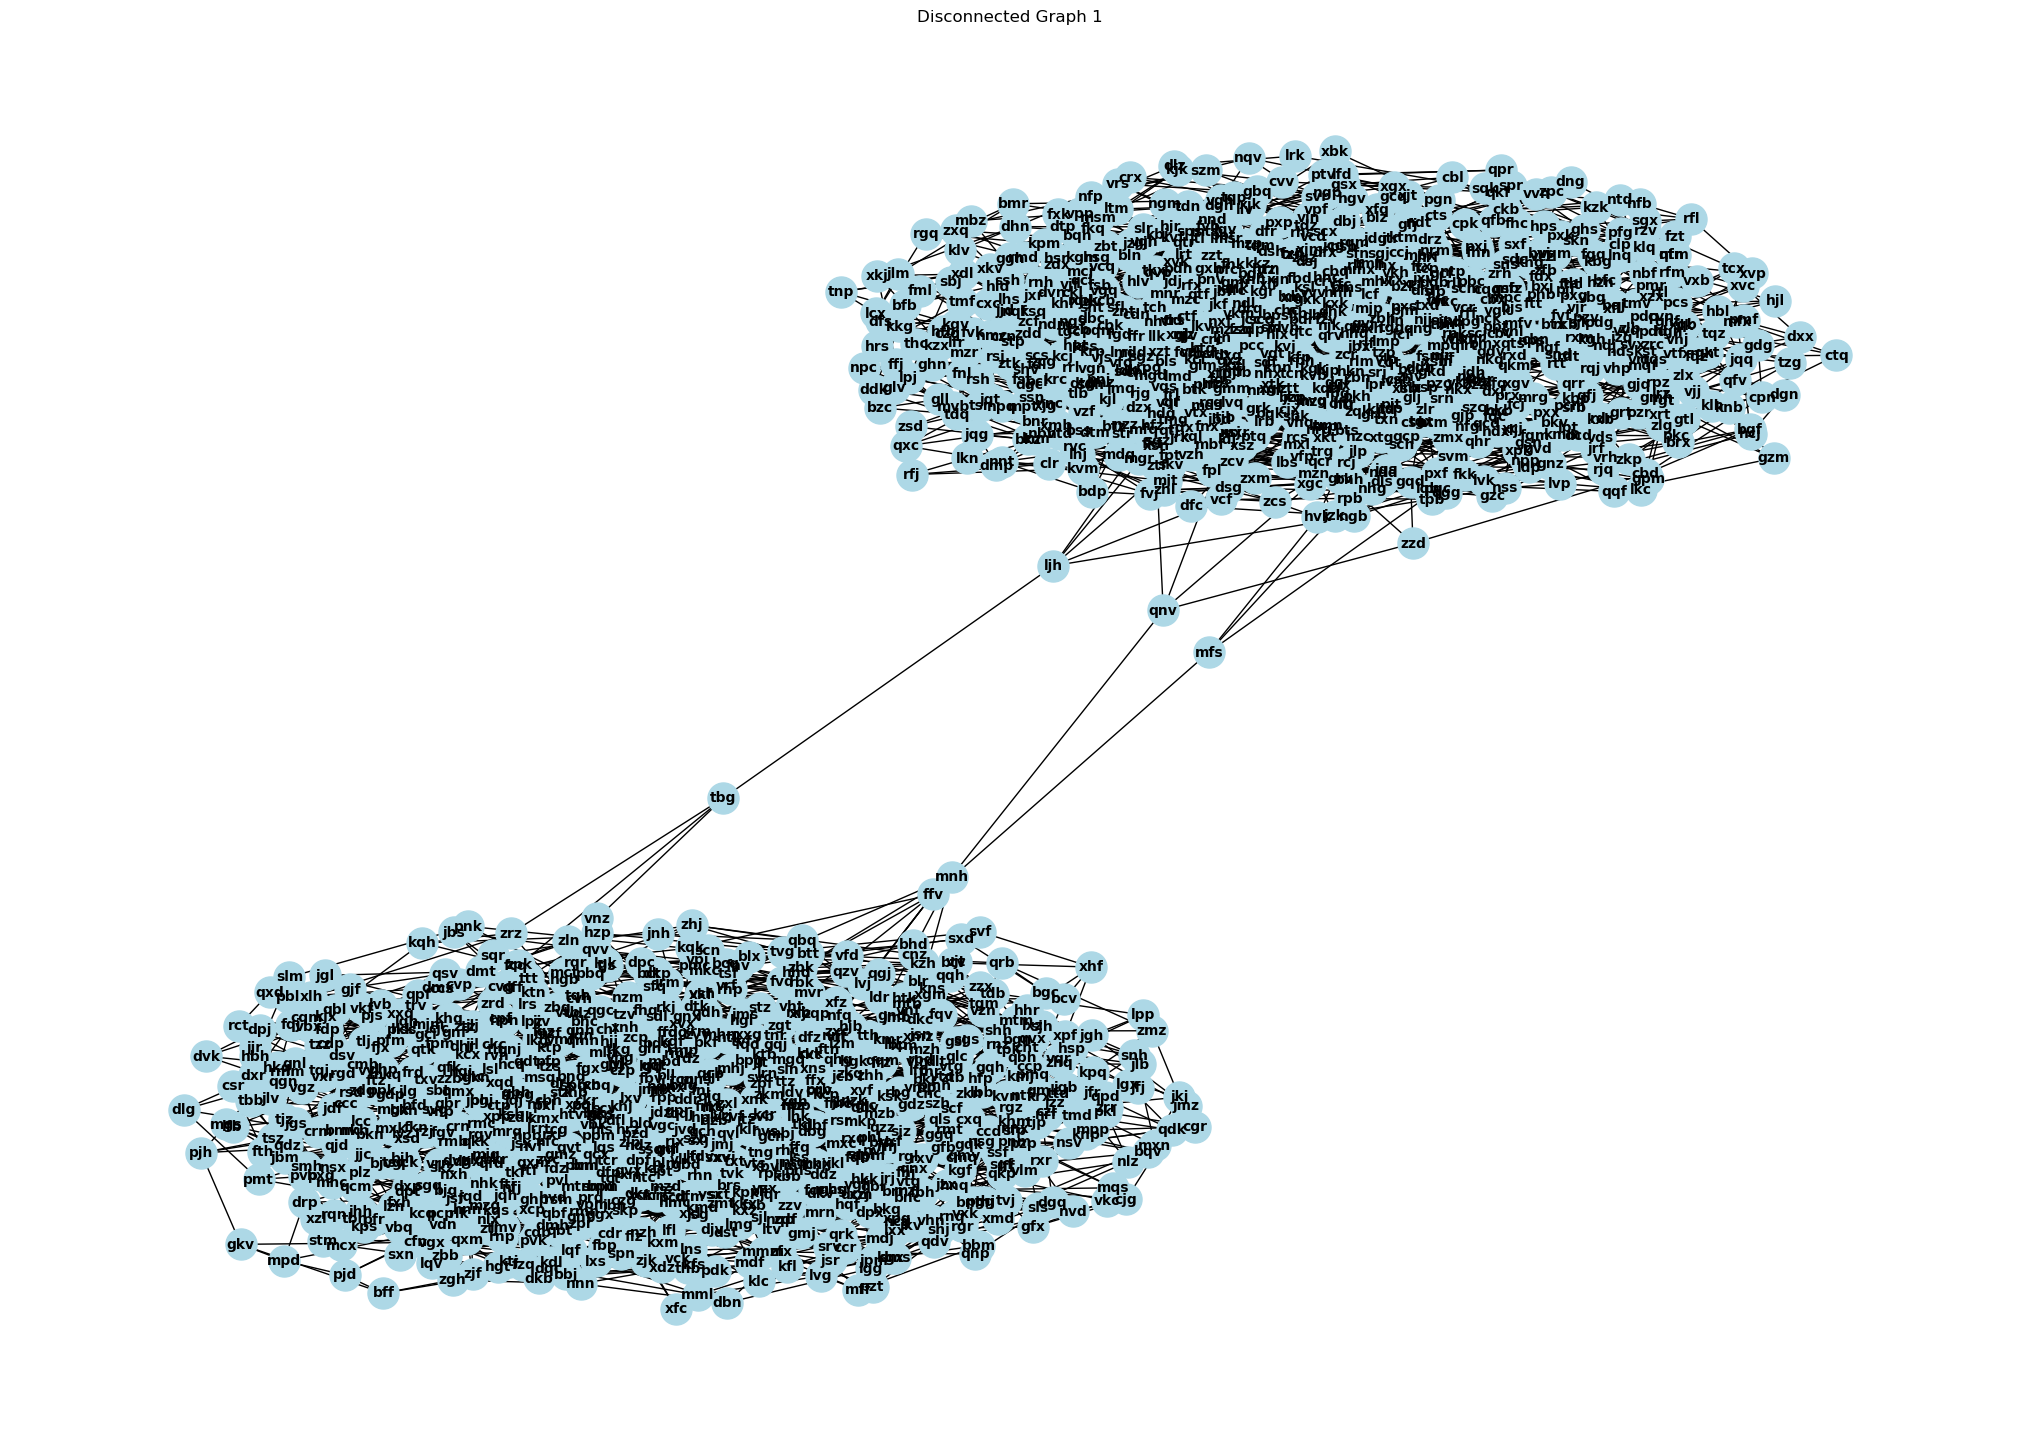

In [7]:
# Define edges to remove for disconnecting the graph
edges_to_remove = [('tbj', 'ljh'), ('mnh', 'qnv'), ('ffv', 'mfs')]  # Replace with actual edges to remove

# Disconnect the graph
disconnected_defined_components = disconnect_graph(G, edges_to_remove)

# Plot the disconnected graphs
for i, component in enumerate(disconnected_defined_components):
   subgraph = G.subgraph(component)
   plot_graph(subgraph, f'Disconnected Graph {i + 1}')